In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
# 데이터 로드
data = pd.read_csv("IMDB Dataset.csv")

# 데이터 확인
print("데이터 샘플:\n", data.head())
print("데이터셋 크기:", data.shape)

데이터 샘플:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
데이터셋 크기: (50000, 2)


In [3]:
# 레이블을 1(positive) or 0(negative) 숫자로 변환해 y 설정
y = data['sentiment'].map({'positive':1,'negative':0})

In [4]:
print(y)

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [5]:
max_words = 5000  # 사용할 최대 단어 수
max_len = 100     # 시퀀스 최대 길이

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['review'])
X = tokenizer.texts_to_sequences(data['review'])
X = pad_sequences(X, maxlen=max_len)

In [7]:
#모델 생성 (임베딩 사용해서 데이터의 감정 학습)
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # 결과인 y가 1 or 0이므로 sigmoid 함수 사용
])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - loss: 0.4913 - val_loss: 0.3260
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - loss: 0.1796 - val_loss: 0.4128
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.0385 - val_loss: 0.7860
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.0112 - val_loss: 1.2062
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0050 - val_loss: 1.4259
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0051 - val_loss: 1.4582
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0030 - val_loss: 1.6503
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0023 - val_loss: 1.8915
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0025 - val_loss: 1.7657
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0022 - val_loss: 1.9377


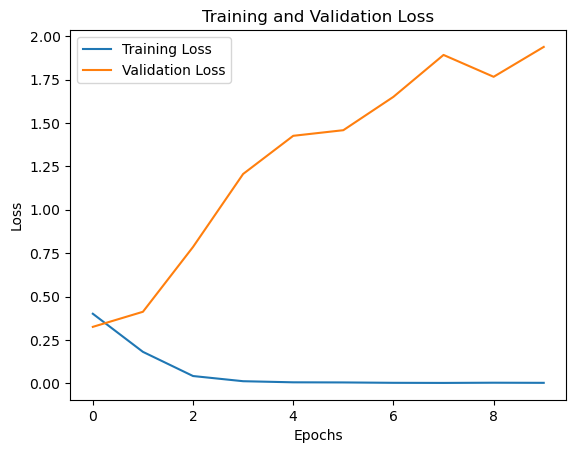

In [8]:
model.compile(loss= BinaryCrossentropy())

import matplotlib.pyplot as plt

# 모델 학습 (history 객체 반환)
history = model.fit(X, y, epochs=10, validation_split=0.2)

# 학습 곡선 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # 드롭아웃 추가
    Dense(32, activation='relu'),
    Dropout(0.5),  # 드롭아웃 추가
    Dense(1, activation='sigmoid')
])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.5417 - val_loss: 0.3473
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.2553 - val_loss: 0.3587
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.1207 - val_loss: 0.5440
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0538 - val_loss: 0.8883
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0403 - val_loss: 0.9605
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0238 - val_loss: 1.2416
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 0.0238 - val_loss: 1.3125
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 0.0258 - val_loss: 1.2580
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 0.0154 - val_loss: 1.5666
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0176 - val_loss: 1.6320


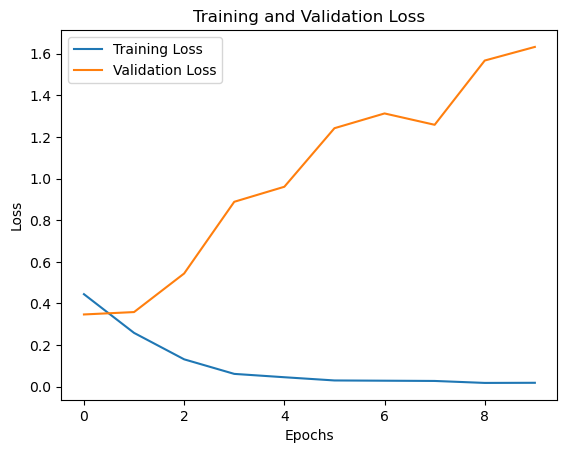

In [13]:
model.compile(loss= BinaryCrossentropy())

import matplotlib.pyplot as plt

# 모델 학습 (history 객체 반환)
history = model.fit(X, y, epochs=10, validation_split=0.2)

# 학습 곡선 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()